# 12.3.A Visualizations

We need some imports to start making some visualizations.  The visualization packages we'll be using are `matplotlib` and `seaborn`.  For the most part, we'll be sticking to `seaborn` due to its ease of use compared to other options, but this package is actually built on top of `matplotlib` (i.e. the `seaborn` functions we'll be using are actually calling `matplotlib` functions).

We'll also use  a 'magic' command.  [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) are something we'll use to make our code behave differently in jupyter/colab notebook.  For example, the magic we're using is related to plots being displayed.  Note, this command isn't technically needed in a lot of places because it's loaded automatically in a lot of places, but in general, its good to write code that will work the same in different locations.

Magic commands start with `%` and then we write out the specific command we're after.  

* Write the import statements for the below:

|        package       | alias |
|:--------------------:|:-----:|
| `pandas`             |  `pd` |
| `numpy`              |  `np` |
| `seaborn`            | `sns` |
| `matplotlib.pyplot`  | `plt` |

* Also, import the `stats` module from `scipy` (I couldn't think of a good way to add this to the table)

* Write a magic command for `matplotlib inline` (remember that magic commands start with `%`

<IPython.core.display.Javascript object>

In [28]:
postgres_user = "dabc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "studentsperformance"

conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"

<IPython.core.display.Javascript object>

* Write a query to pull back all of the `studentsperformance` table from SQL

In [29]:
query = """

"""

students = pd.read_sql_query(query, con=conn_str)

<IPython.core.display.Javascript object>

### Inspect the dataframe

We want to get into visualizing the data, but we need to know what we're working with.

* How many rows / columns do we have?

* What are our columns datatypes?

* Do we have missing values?
  * If yes, how should we handle them?

* What does the `.head()` of our data look like?

* Display the std/min/max/mean/count of each numeric column
  * *Hint: this can be done with a single method*

* Do we have any variables that are correlated?
  * Is this a positive or negative correlation?

### Visualizing!!

#### `seaborn` templates

##### General

The `seaborn` functions have a typical structure of:

```python
sns.plot_name(x="col_name_a", y="col_name_b", data=df_name)
```

##### Single variable

There are some plot types that don't take both an `x` and a `y`.  When that's the case, our general format will look more like:

```python
sns.plot_name(df_name["col_name"]
```

##### Coloring

The last general form we'll bring up is how to color the plot by another variable.  This is a very useful feature to help visualize the relationship between more variables than just 2.  For example, the below plot shows the relationship of 3 variables: 2 numeric (`petal_width` & `petal_length`) & 1 categorical (`type`).  From this plot we are able to see that as `petal_width` increases, so does `petal_length` (i.e. they are positively correlated).  We can also see that setosa is has generally smaller petals than versicolor or virginica.

<p>
    <img src='https://miro.medium.com/max/1064/1*3eV7yt7TDUgTMixfGB9fGw.png' width=50%>
</p>

To create a plot like this with `seaborn` we can use the `hue` argument + the general form shown above:

```python
sns.scatterplot(x="col_name_a", y="col_name_b", hue="col_name_c", data=df_name)
```

Note, in addition to `hue` we have other parameters we can use to style our plot like `size` & `style`.

#### Histograms

A histogram is used to visualize the distribution of a single variable (so it will take the form shown in the "Single variable" section above.  The function from `seaborn` that will give us the output we're after is `sns.distplot()` (short for distribution plot).

* Plot a histogram of the `'math score'` column

Note, just like how notebooks will only display the last item in the cell for free.  We can only show one plot per cell unless we call the plotting equivalent of `print()`.

In [30]:
# Only 2 is shown because it is the last thing in the cell
1
2

2

<IPython.core.display.Javascript object>

In [31]:
# If we use print we can display more items than just the last
print(1)
2

1


2

<IPython.core.display.Javascript object>

The plotting equivalent of print is `plt.show()`.  Unlike `print()`, we won't put our plot code inside the parens, instead, we will add the `plt.show()` command as a single line below our plot code.

Write these next 2 plots in the same cell using `plt.show()` to display both

* Plot a histogram of the `'reading score'` column
* Plot a histogram of the `'writing score'` column

#### Scatter plots

The scatter plot is one of the most common chart types out there.  It works fantastically to see how 2 numeric variables relate to each other.  The `seaborn` function for creating a scatter plot is: `sns.scatterplot()`.

* Create a scatter plot of the `math score` and `reading score` columns

##### Getting fancy

* Recreate the above scatter plot, but color by `'gender'`

* Recreate the above scatter plot, but `style` by `'lunch'`

* Recreate the above scatter plot, but `size` by `'writing score'`

#### Boxplots

We can use box plots to compare multiple distributions.  For example, we might want to compare a numeric variable split into 2 groups (like in a t-test (like in a capstone project)).

In our scatter plot above, it looked like females had higher reading scores in our dataset.  Let's create a boxplot to investigate this further.

* Create a boxplot using `sns.boxplot()`
  * Use `'gender'` as `x` and `'reading score'` as `y`
* Alternatives to the box plot that are very very similar in nature are: `sns.violinplot()` & `sns.boxenplot()`; try out these alternatives

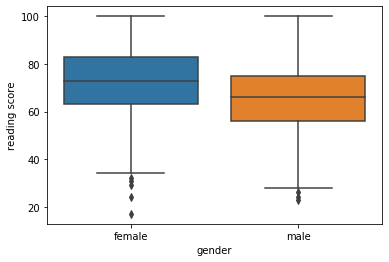

<IPython.core.display.Javascript object>

Let's go down the road of a t-test.

* Split the dataframe into 2 groups based on the `'gender'` column

<IPython.core.display.Javascript object>

* Check if our data has the appropriate shapes to perform a t-test

Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)

<IPython.core.display.Javascript object>

* If the data has the appropriate shape, perform a t-test

* If you see a significant difference in means, use the function below to calculate a 95% confidence interval
* How do we interpret the output?

In [38]:
def get_95_ci(x1, x2):
    # Calculate the difference of means in the observed data
    signal = x1.mean() - x2.mean()
    
    # How much data is there? (sample size with len)
    # How consistent is the data (standard deviation with std)
    noise = np.sqrt(x1.std() ** 2 / len(x1) + x2.std() ** 2 / len(x2))
    
    # Signal plus or minus noise (1.96 relates to 95% confidence level)
    ci_lower_bound = signal - 1.96 * noise
    ci_upper_bound = signal + 1.96 * noise

    return (ci_lower_bound, ci_upper_bound)

<IPython.core.display.Javascript object>

*Note, the slides have a couple more chart types that we didn't dive into in this notebook, and `seaborn` has many many more chart types.  Explore and create.*